### Models used are,
* RF
* KNN
* SVM 
* XGBoost
* Stacking classifier having KNN,SVM and XGBoost <br>
### Preprocessing techniques used are,
* Outlier removal using IQR
* SMOTE over-sampling to handle class imbalance
* PCA to reduce dimensionality

All models are hyper-parameter tuned to get the best out of it <br>
SVM -> 99% accuracy
RF,KNN,XGBoost, Stacking classifier -> Above 93% accuracy

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fetal-health-classification/fetal_health.csv


In [2]:
data = pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [4]:
data['fetal_health'] = data['fetal_health'].map({1:'Normal', 2:'Suspect', 3:'Pathological'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:

plot_data = data.groupby('fetal_health')['fetal_health'].agg(['count']).reset_index()

fig = px.pie(plot_data, values = plot_data['count'], names = plot_data['fetal_health'])

fig.update_traces(textposition = 'inside', textinfo = 'percent + label', hole = 0.4, 
                  marker = dict(colors = ['#2A3132','#336B87'], line = dict(color = 'white', width = 1.6)))

fig.update_layout(title_text = 'Fetal<br>Health', title_x = 0.5, title_y = 0.55, title_font_size = 26, 
                  title_font_family = 'Calibri', title_font_color = 'black', showlegend = False)
                  
fig.show()

In [6]:
data.isnull().any()

baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

In [7]:
data.isna().any()

baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

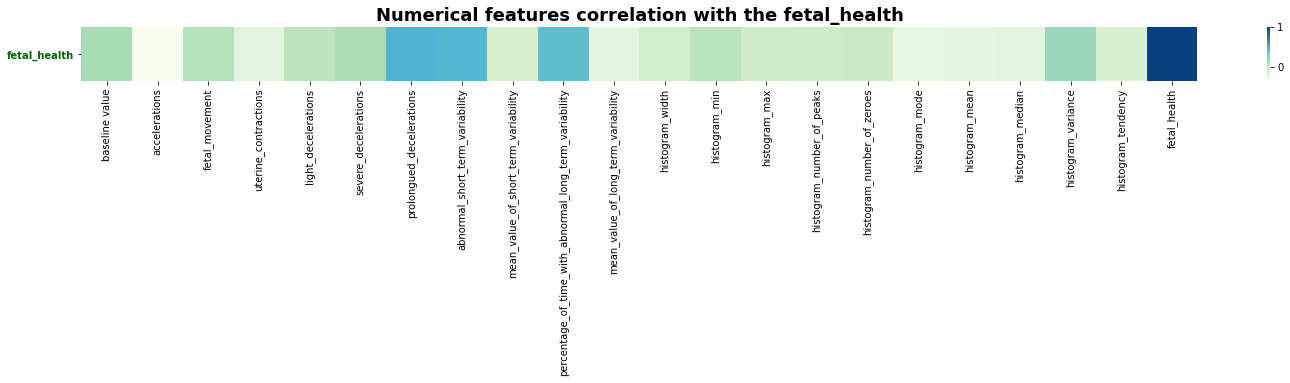

In [8]:
data_tmp = data.copy()
data_tmp['fetal_health'] = data_tmp['fetal_health'].map({'Normal':1, 'Suspect':2, 'Pathological':3})
numeric_data = data_tmp.select_dtypes(exclude="object")
numeric_corr = data_tmp.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap="GnBu")
plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18)
plt.yticks(weight="bold", color="darkgreen", rotation=0)

plt.show()

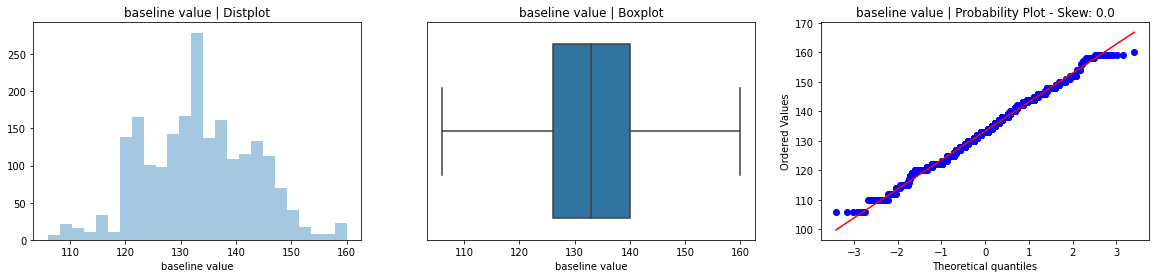

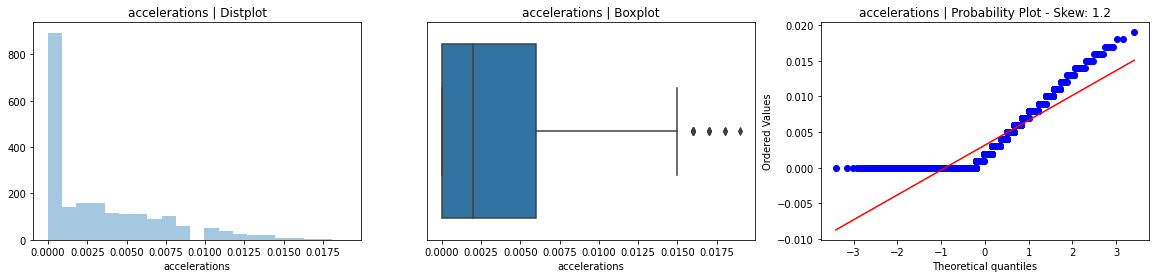

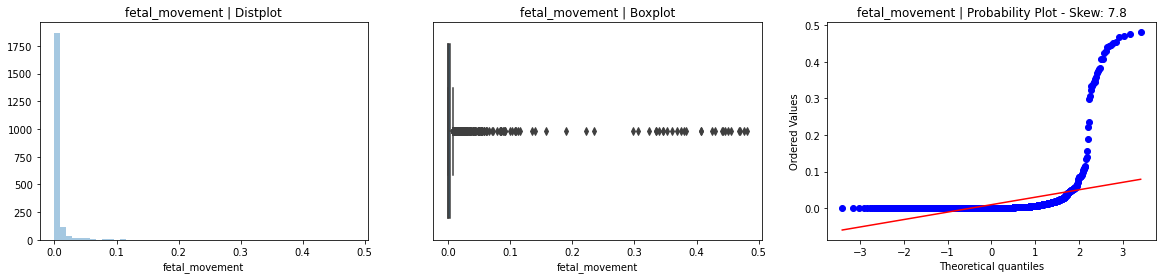

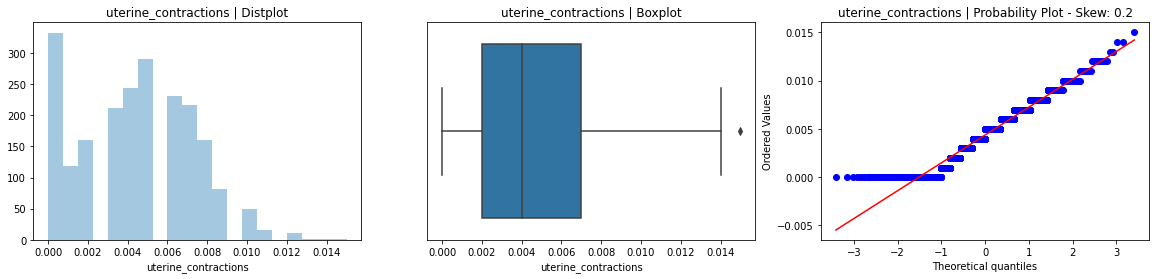

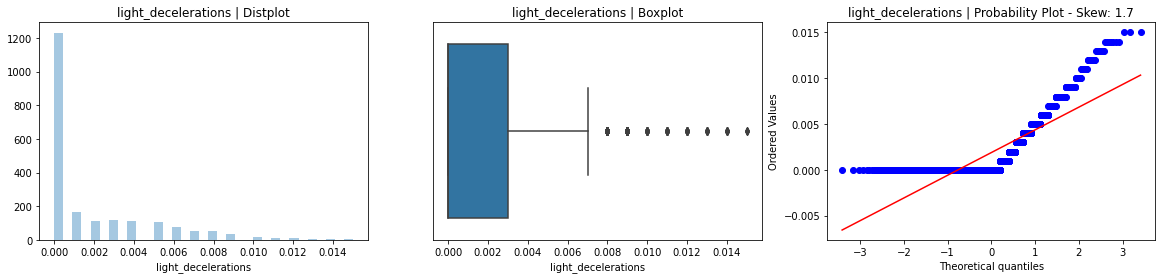

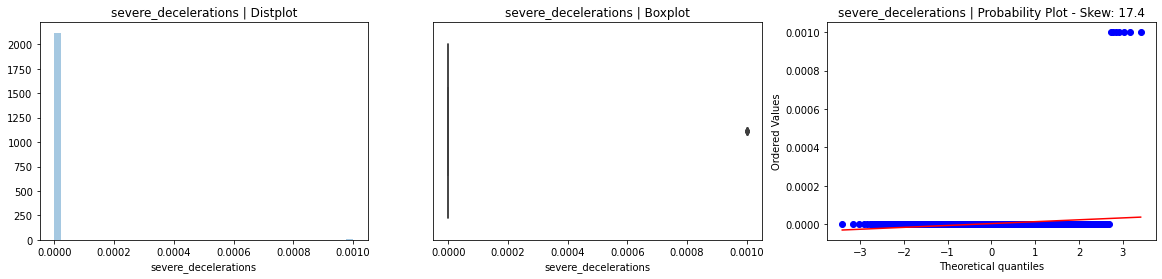

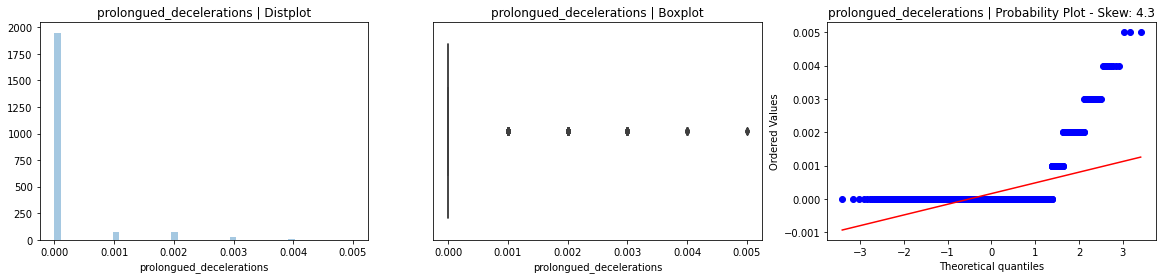

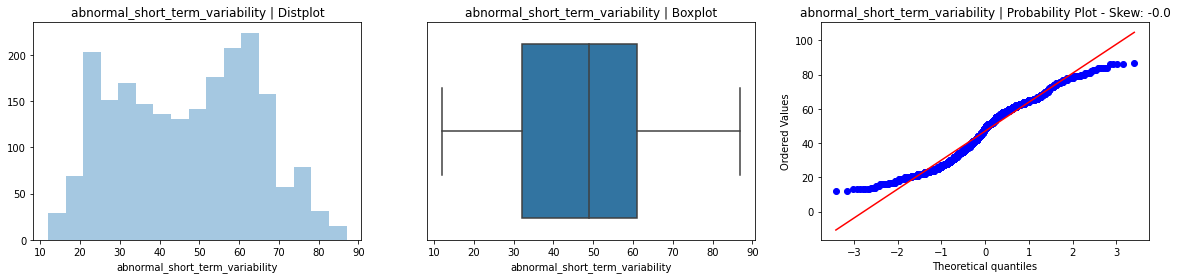

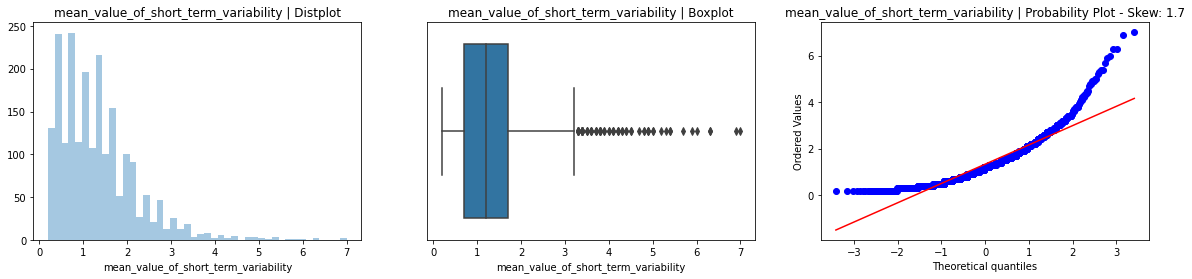

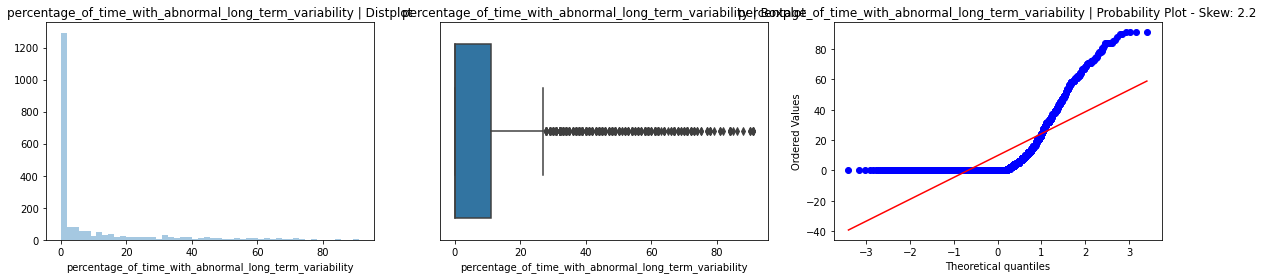

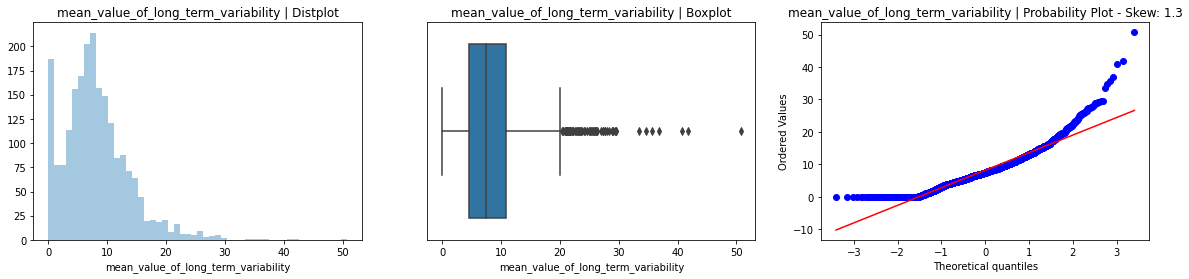

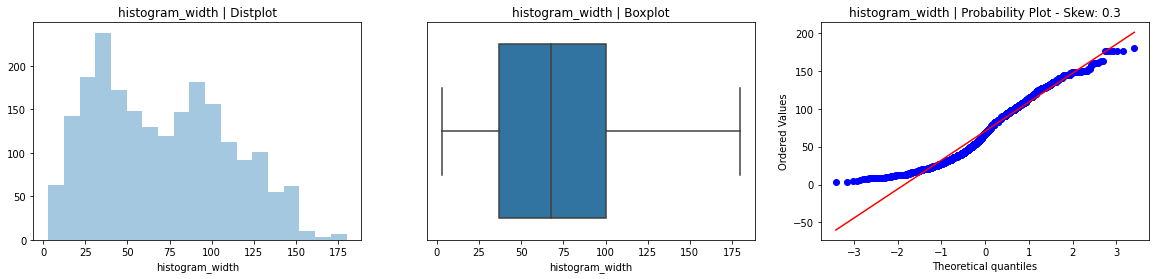

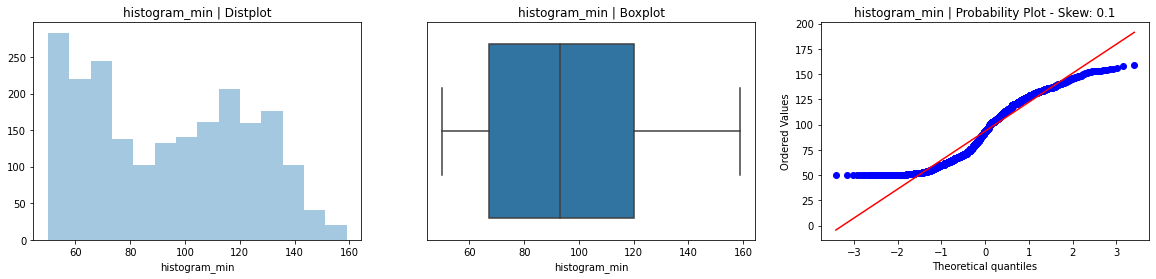

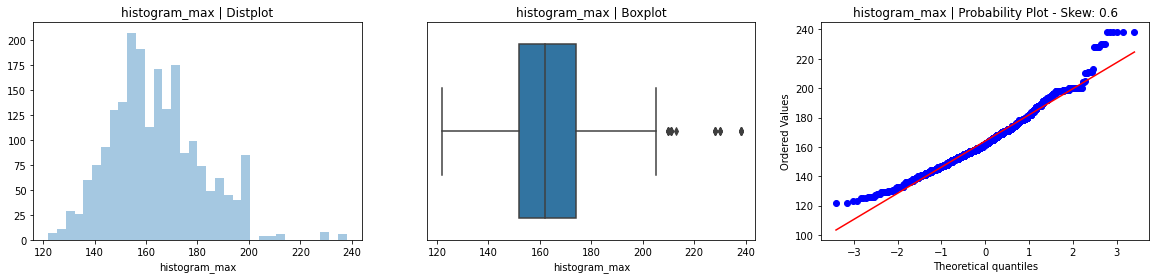

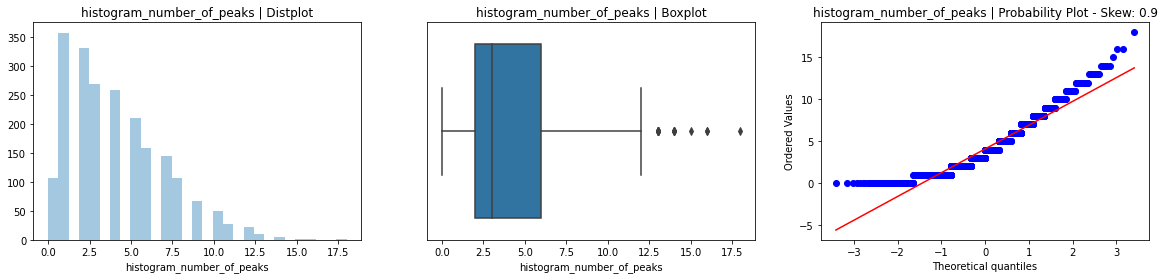

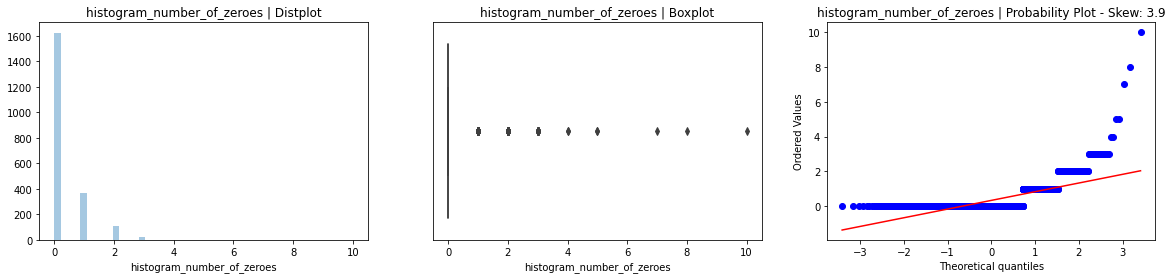

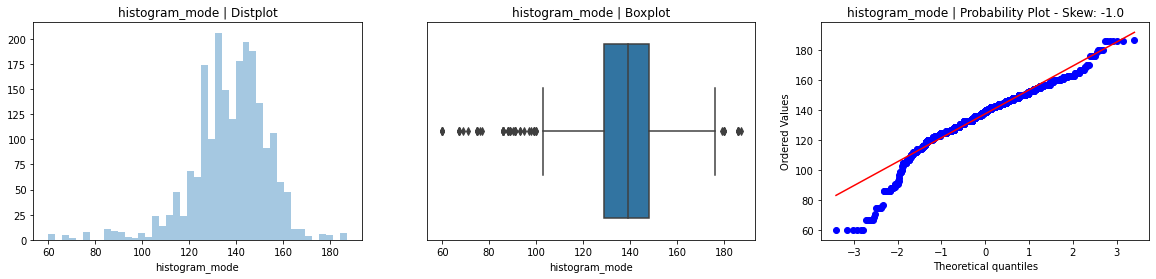

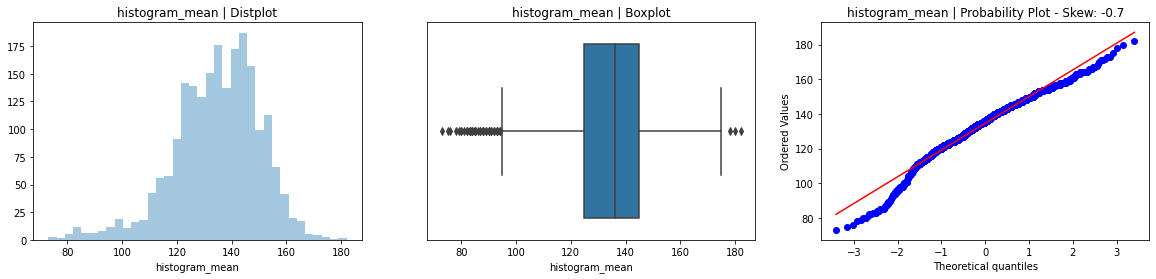

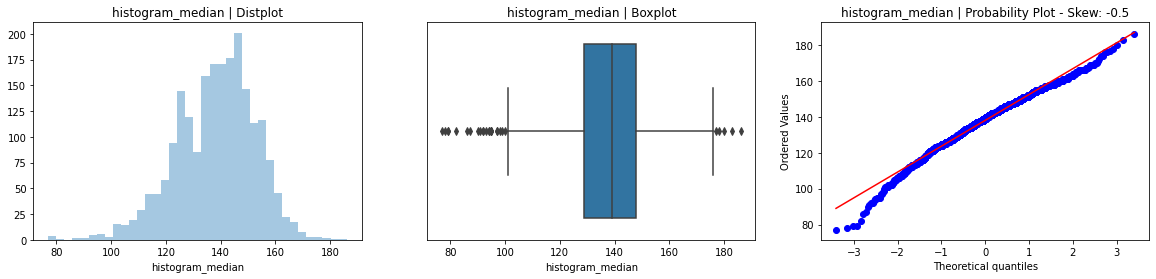

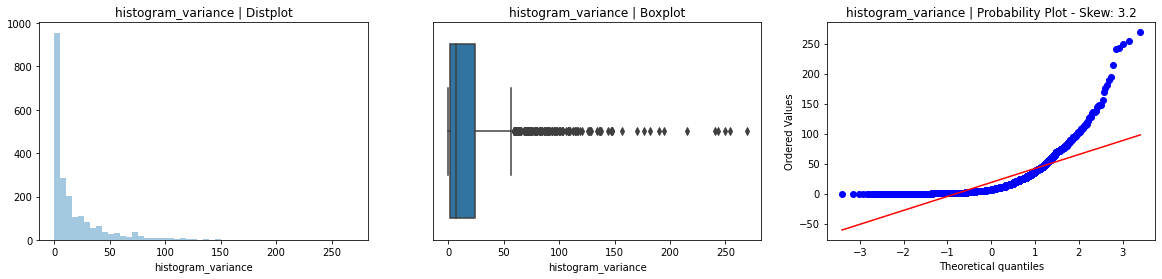

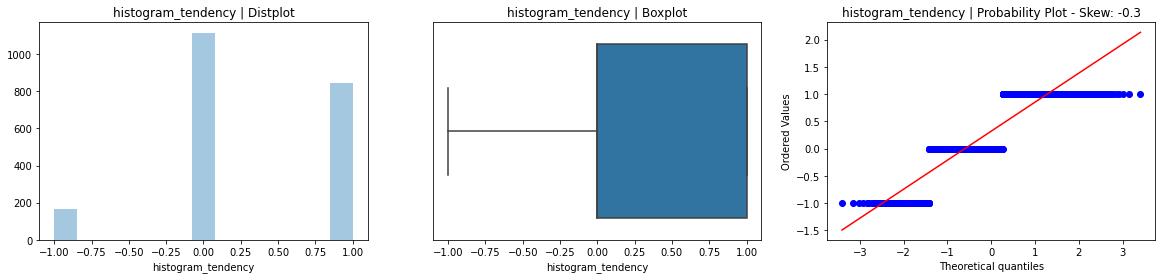

In [9]:

from scipy.stats import probplot,skew
import warnings
warnings.filterwarnings("ignore")

features = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
for i in features:
    fig, axes = plt.subplots(1, 3, figsize=(20,4))
    sns.distplot(data[i],kde=False, ax=axes[0])
    sns.boxplot(data[i], ax=axes[1])
    probplot(data[i], plot=axes[2])
    skew_val=round(data[i].skew(), 1)
    axes[1].set_yticklabels([])
    axes[1].set_yticks([])
    axes[0].set_title(i + " | Distplot")
    axes[1].set_title(i + " | Boxplot")
    axes[2].set_title(i + " | Probability Plot - Skew: "+str(skew_val))
    plt.show()

In [10]:
#Importing mutual information library from sklearn feature selection
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression

In [11]:

#Evaluating Mutual information score for each feature    
def make_mi_scores(X,Y):
    mi_scores=mutual_info_classif(X,Y)
    mi_scores=pd.Series(mi_scores ,name="MI_scores",index=X.columns)
    mi_scores=mi_scores.sort_values(ascending=False)
    return(mi_scores)

mi_scores=make_mi_scores(data[features],data["fetal_health"])
mi_scores

mean_value_of_short_term_variability                      0.211668
abnormal_short_term_variability                           0.193231
percentage_of_time_with_abnormal_long_term_variability    0.183158
histogram_mean                                            0.169873
histogram_mode                                            0.144099
histogram_median                                          0.141318
histogram_min                                             0.136722
histogram_variance                                        0.132693
histogram_width                                           0.125932
accelerations                                             0.124314
baseline value                                            0.121128
prolongued_decelerations                                  0.100674
mean_value_of_long_term_variability                       0.073363
histogram_max                                             0.066232
uterine_contractions                                      0.05

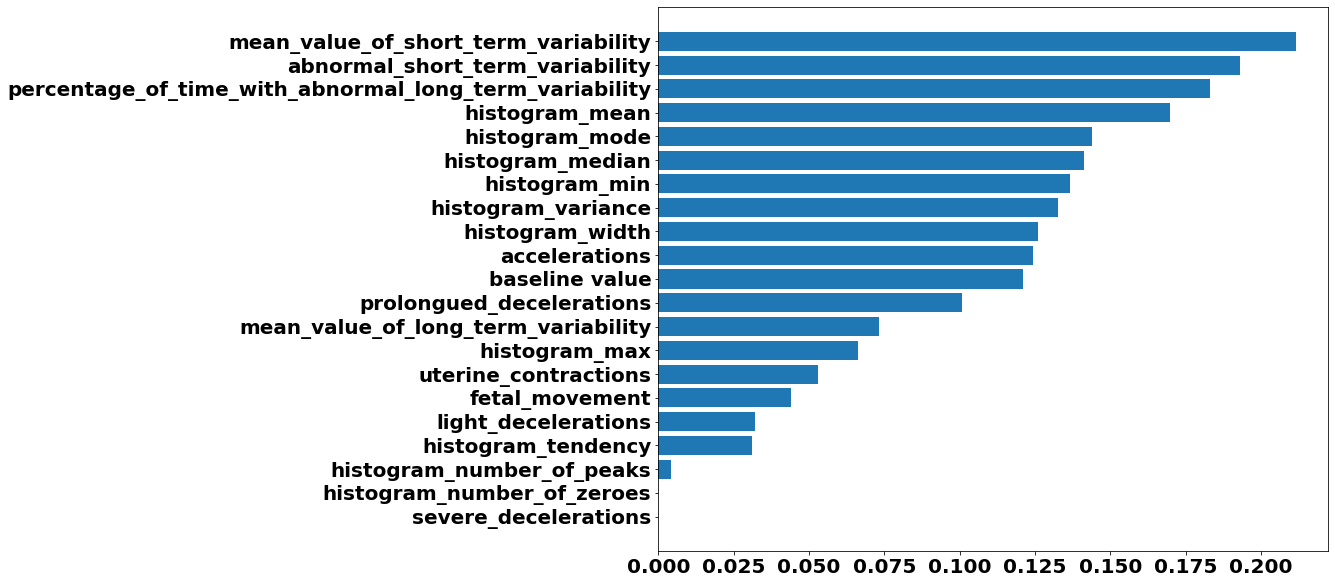

In [12]:
#Plotting mutual information bar graph 
def plot_mi_scores(scores):
    scores=scores.sort_values(ascending=True)
    width=np.arange(len(scores))
    ticks=scores.index
    plt.barh(width,scores)
    plt.yticks(width,ticks,fontweight='bold',fontsize=20)
    plt.xticks(fontweight='bold',fontsize=20)
plt.figure(figsize=(12,10))
plot_mi_scores(mi_scores)

****

In [13]:
#Handling the outliers
def outlier_treatment(col):
    Q1,Q3 = np.percentile(data[col] , [25,75]) 
    print(Q1,Q3)
    IQR = Q3-Q1
    #print(IQR)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    #print(lower_range,upper_range)
    #print(col_data[col_data[col]>100])
    data.loc[data[col]>upper_range,col] = upper_range
    data.loc[data[col]<lower_range,col] = lower_range
    
cols_with_outliers = ['accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance']
for col in cols_with_outliers:
    outlier_treatment(col)

0.0 0.006
0.0 0.003
0.002 0.007
0.0 0.003
0.0 0.0
0.0 0.0
0.7 1.7
0.0 11.0
4.6 10.8
152.0 174.0
2.0 6.0
0.0 0.0
129.0 148.0
125.0 145.0
129.0 148.0
2.0 24.0


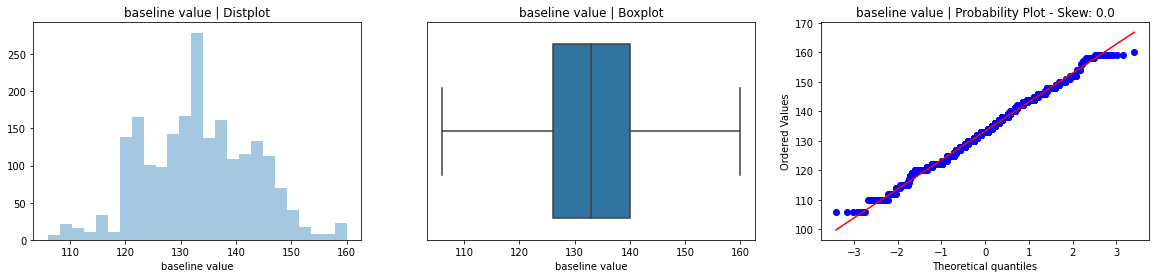

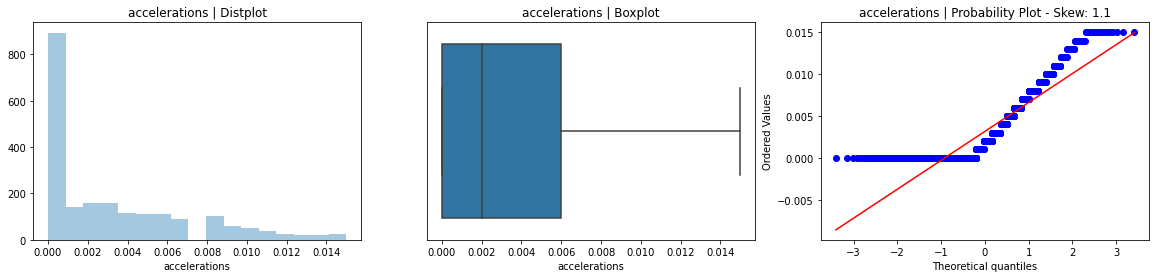

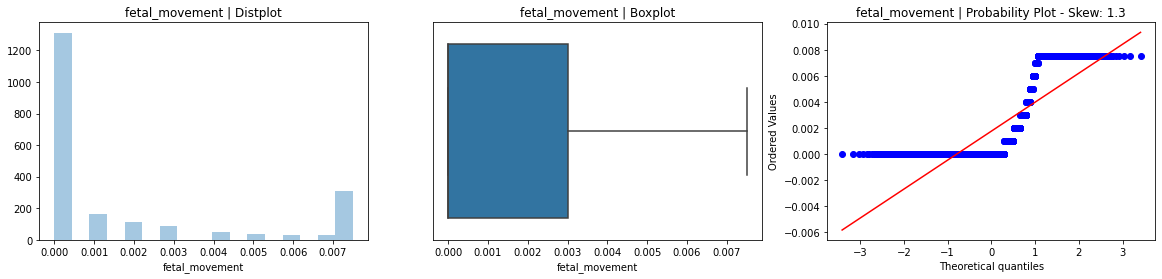

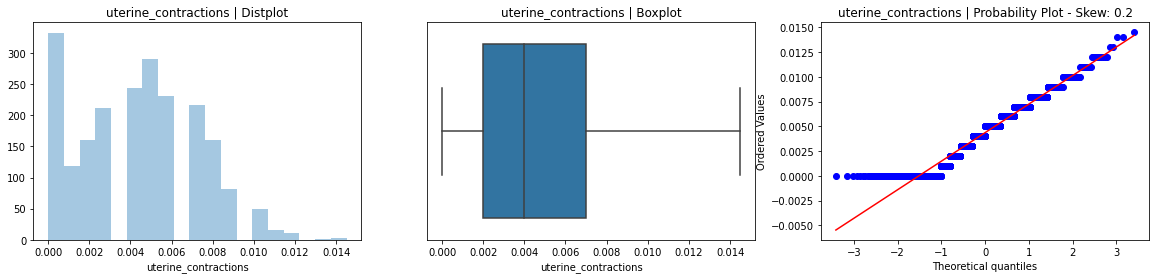

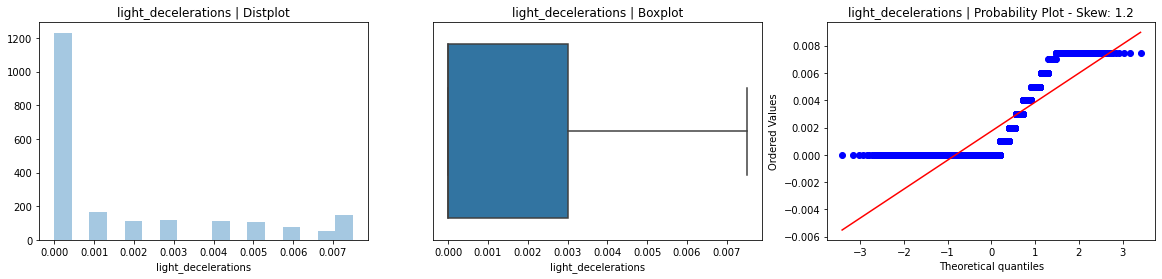

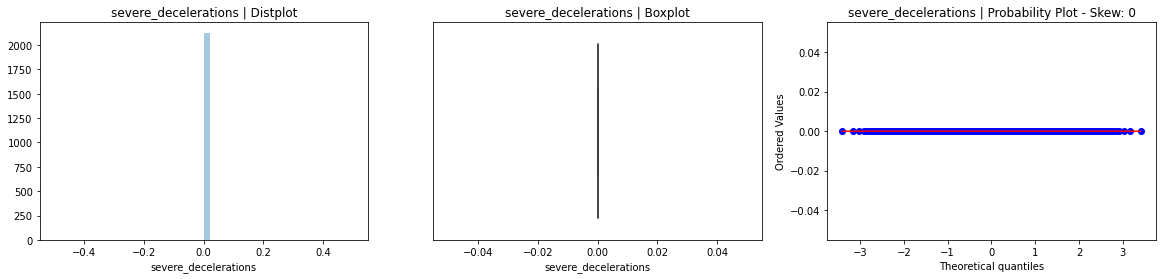

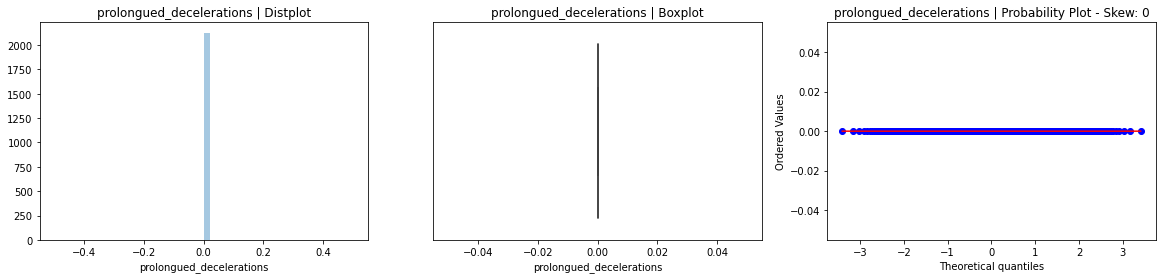

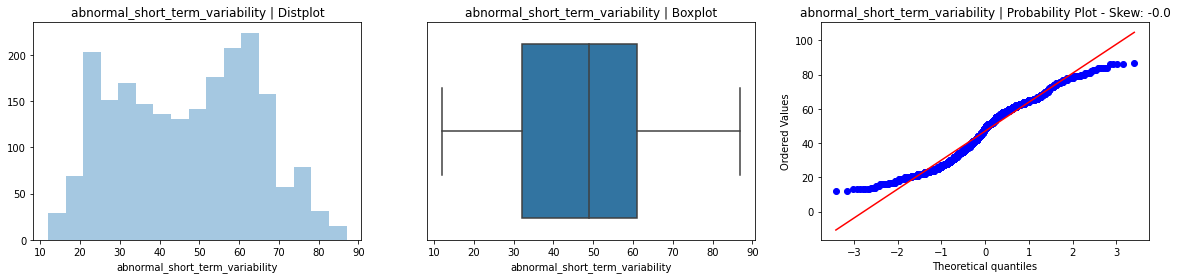

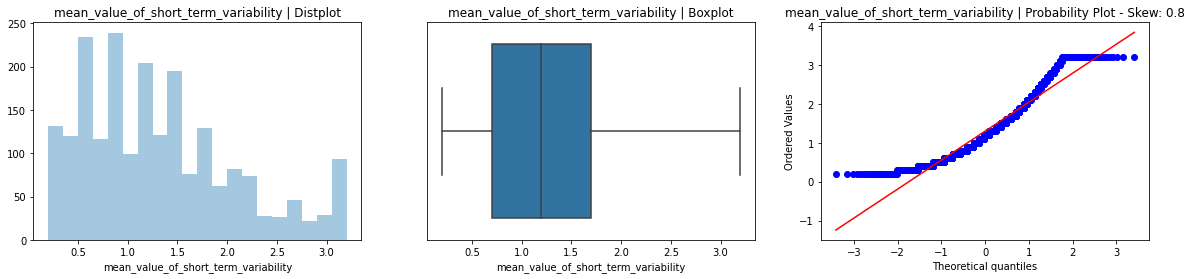

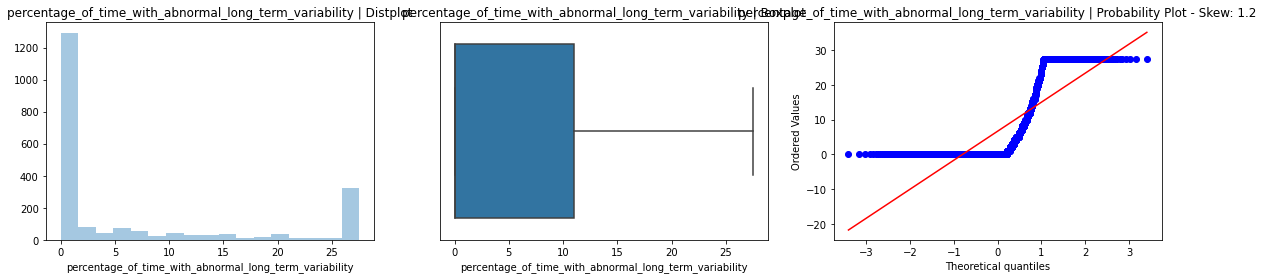

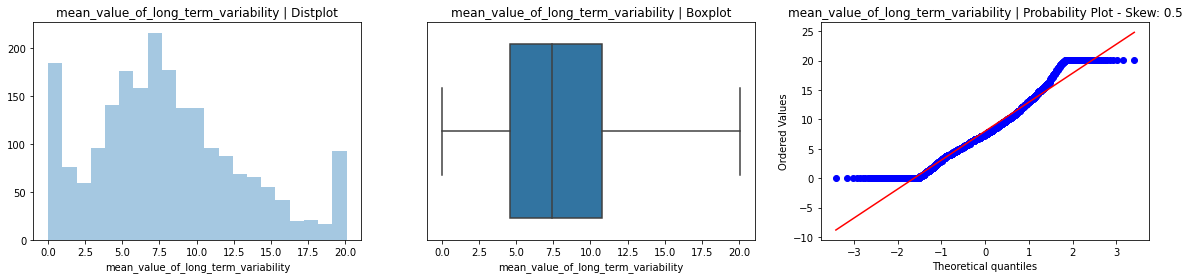

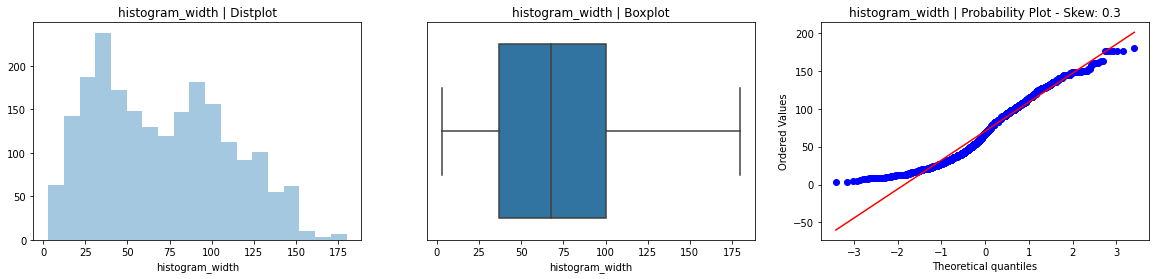

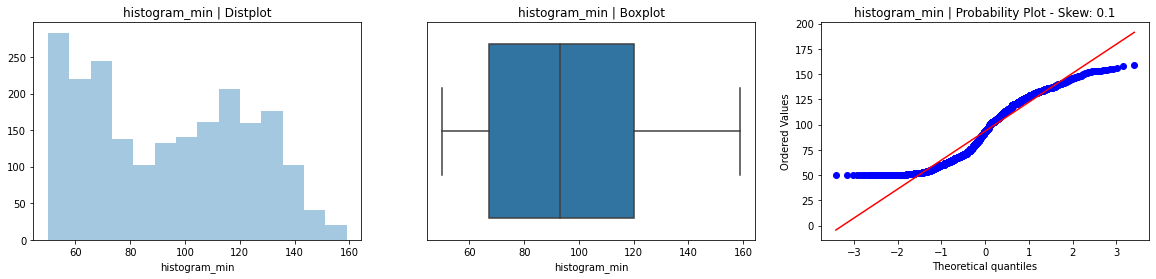

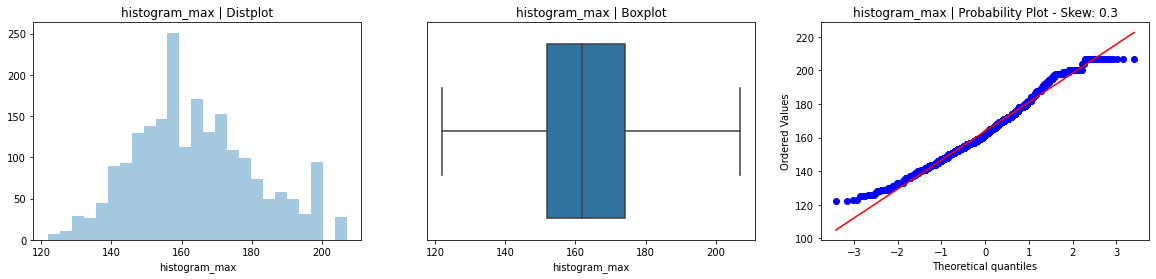

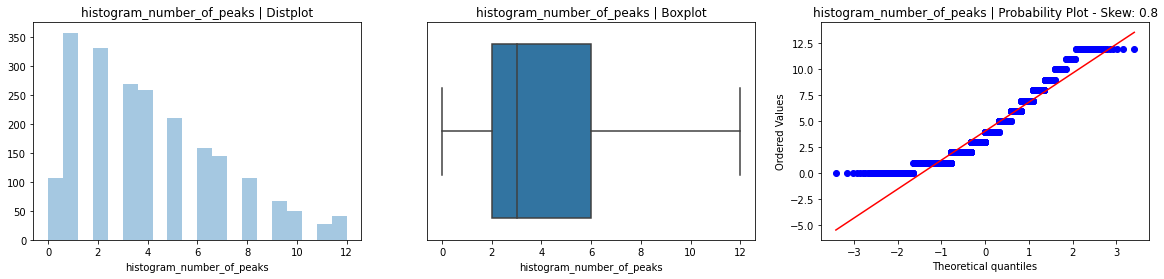

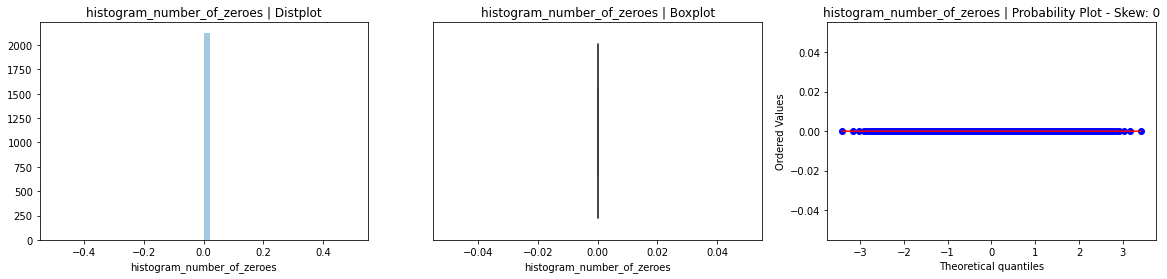

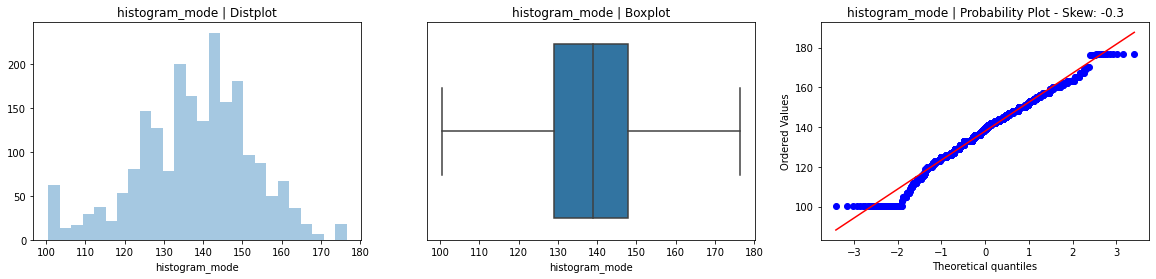

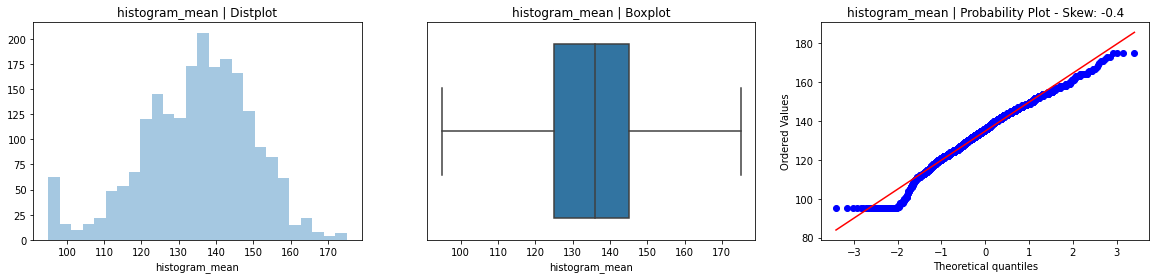

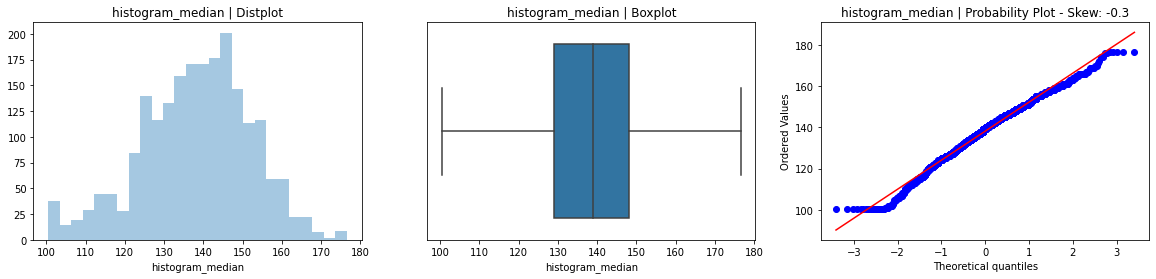

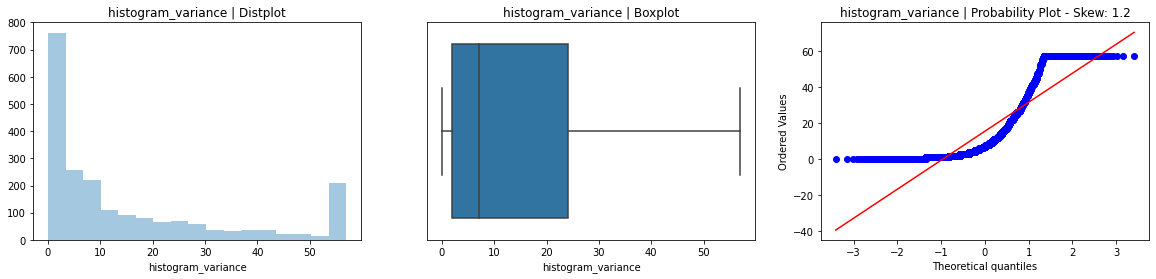

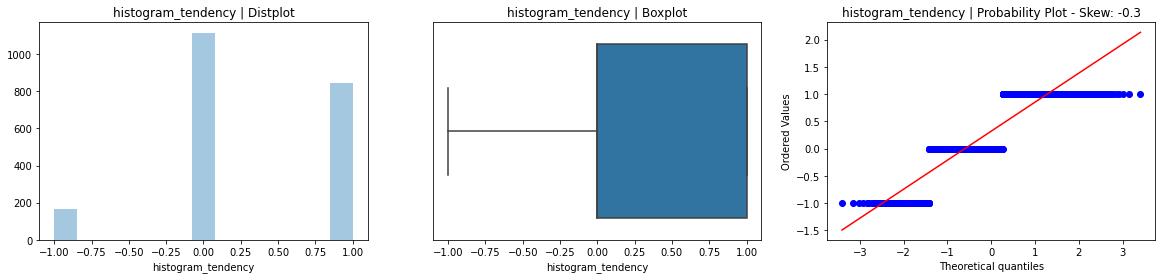

In [14]:
for i in features:
    fig, axes = plt.subplots(1, 3, figsize=(20,4))
    sns.distplot(data[i],kde=False, ax=axes[0])
    sns.boxplot(data[i], ax=axes[1])
    probplot(data[i], plot=axes[2])
    skew_val=round(data[i].skew(), 1)
    axes[1].set_yticklabels([])
    axes[1].set_yticks([])
    axes[0].set_title(i + " | Distplot")
    axes[1].set_title(i + " | Boxplot")
    axes[2].set_title(i + " | Probability Plot - Skew: "+str(skew_val))
    plt.show()

**Feature engineering**

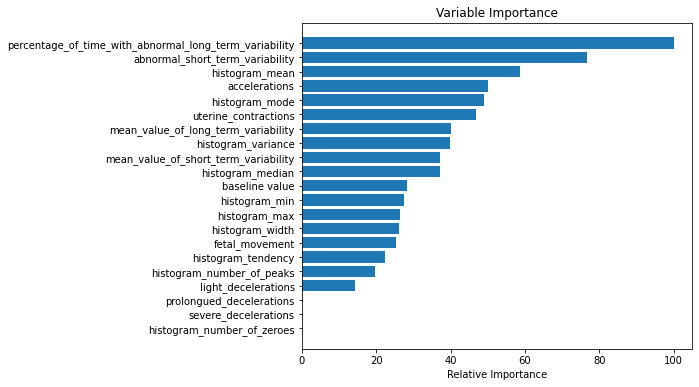

In [15]:
feature_cols = data.columns.drop('fetal_health')
target = ["fetal_health"]
#model = RandomForestRegressor(n_estimators=100, random_state=0)
#my_pipeline.fit(X_train, y_train)
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler

#standsrdising the values
array = data.values
X = array[:,0:21]
Y = array[:,21]
scale= StandardScaler()
X = scale.fit_transform(X) 
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
#print(model.feature_importances_,feature_cols)
feature_importance =model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig,ax=plt.subplots(1,1,figsize=(7,6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [16]:
# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from xgboost import XGBClassifier
 
# # get a list of models to evaluate
# def get_models():
# 	models = dict()
# 	for i in range(1,22):
# 		steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
# 		models[str(i)] = Pipeline(steps=steps)
# 	return models
 
# # evaluate a given model using cross-validation
# def evaluate_model(model, X, y):
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# 	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# 	return scores
 
# # define dataset

# # get the models to evaluate
# models = get_models()
# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
# 	scores = evaluate_model(model, X, Y)
# 	results.append(scores)
# 	names.append(name)
# #	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.xticks(rotation=45)
# pyplot.show()

## Principal Component Analysis

>1 0.801 (0.014)
>2 0.800 (0.015)
>3 0.864 (0.021)
>4 0.865 (0.022)
>5 0.866 (0.023)
>6 0.875 (0.021)
>7 0.870 (0.020)
>8 0.868 (0.022)
>9 0.874 (0.025)
>10 0.876 (0.026)
>11 0.885 (0.024)
>12 0.884 (0.023)
>13 0.890 (0.021)
>14 0.893 (0.019)
>15 0.894 (0.020)
>16 0.894 (0.021)
>17 0.897 (0.019)
>18 0.898 (0.019)
>19 0.898 (0.019)
>20 0.898 (0.019)
>21 0.898 (0.019)


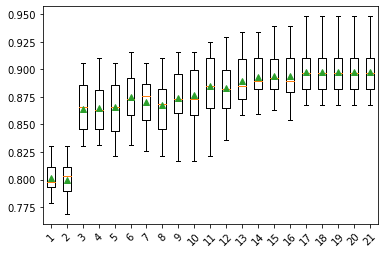

In [17]:
from sklearn.decomposition import KernelPCA,PCA

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
# get a list of models to evaluate
def get_models(alg,pca):
    models = dict()
    for i in range(1,22):
        if pca=='pca':
            steps = [('pca', PCA(n_components=i)), ('m', alg)]
            models[str(i)] = Pipeline(steps=steps)
        elif pca=='kpca':
            steps = [('pca', KernelPCA(n_components=i,kernel='rbf')), ('m', alg)]
            models[str(i)] = Pipeline(steps=steps)
    return models

def do_pca(alg,pca):
    models = get_models(alg,pca)
    # evaluate the models and store results
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X, Y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    # plot model performance for comparison
    pyplot.boxplot(results, labels=names, showmeans=True)
    pyplot.xticks(rotation=45)
    pyplot.show()
    
do_pca(LogisticRegression(),'pca')

>1 0.787 (0.009)
>2 0.789 (0.014)
>3 0.858 (0.019)
>4 0.866 (0.018)
>5 0.868 (0.016)
>6 0.868 (0.020)
>7 0.873 (0.019)
>8 0.872 (0.018)
>9 0.872 (0.019)
>10 0.871 (0.019)
>11 0.875 (0.017)
>12 0.876 (0.018)
>13 0.882 (0.018)
>14 0.883 (0.017)
>15 0.882 (0.017)
>16 0.886 (0.017)
>17 0.887 (0.017)
>18 0.886 (0.016)
>19 0.886 (0.017)
>20 0.887 (0.015)
>21 0.886 (0.015)


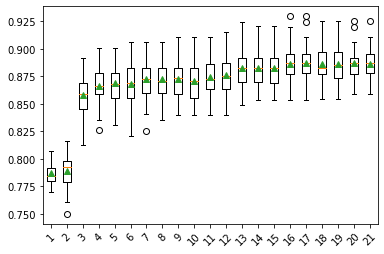

In [18]:
do_pca(LogisticRegression(),'kpca')

After PCA, dimensionality can be reduced from 21 to 18 by keeping all the information

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import learning_curve
## Train Test Split without upsampling
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state=10)

## Train Test Split after upsampling
sm=SMOTE()
X_train_smote,y_train_smote=sm.fit_resample(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size = 0.25, random_state=10)


In [20]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV #Paramterizers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #Accuracy metrics
import itertools #Used for iterations
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# Plot learning curve
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#80CBC4",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#00897B",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
def plot_cm(y_test,y_pred):
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "BuGn");
    # labels, title and ticks
    ax.set_xlabel("Predicted labels");
    ax.set_ylabel("True labels"); 
    ax.set_title("Confusion Matrix"); 
    ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);
    ax.yaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);
    print("Classification Report")
    print(classification_report(y_test, y_pred))

#Using Random Forest
def model_RF(X,x_test,y,y_test):
    rf_params = {"n_estimators" :[100], 
                 "max_features": [18], 
                 "min_samples_split": [18],
                "max_depth": [5]}
    rf_model = RandomForestClassifier(random_state = 12345)
    gs_cv = GridSearchCV(rf_model, 
                        rf_params,
                        cv = 5,
                        n_jobs = -1,
                        verbose = 2).fit(X, y)
    gs_cv.best_params_
    rf_tuned = RandomForestClassifier(**gs_cv.best_params_)
    scores_knn= cross_val_score(rf_tuned, X, y, cv = 5)
    print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
    print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")
    rf_tuned.fit(X, y)
    plot_cm(y_test,rf_tuned.predict(x_test))
    print("Best parameters")
    print(gs_cv.best_params_)
    plot_learning_curve(gs_cv.best_estimator_,title = "Learning curve", x = X, y = y, cv = 5);
    
    return gs_cv.best_params_, rf_tuned

In [22]:
#rf_params, rf_tuned = model_RF(X_train, X_test, y_train, y_test)

In [23]:

#Using KNN
def model_KNN(X,x_test,y,y_test):
    params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
    model = KNeighborsClassifier(n_jobs=-1)
    gs_cv = GridSearchCV(model, 
                        params,
                        cv = 5,
                        n_jobs = -1,
                        verbose = 2).fit(X, y)
    gs_cv.best_params_
    tuned = KNeighborsClassifier(**gs_cv.best_params_)
    scores_knn= cross_val_score(tuned, X, y, cv = 5)
    print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
    print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")
    tuned.fit(X, y)
    plot_cm(y_test,tuned.predict(x_test))
    print("Best parameters")
    print(gs_cv.best_params_)
    plot_learning_curve(gs_cv.best_estimator_,title = "Learning curve", x = X, y = y, cv = 5);
    return gs_cv.best_params_, tuned

In [24]:
#knn_params, knn_tuned = model_KNN(X_train, X_test, y_train, y_test)

In [25]:
#Using KNN
def model_XGB(X,x_test,y,y_test):
    params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01,0.1],
    'booster': ['gbtree'],
    'gamma': [0.5, 1],
    'reg_alpha': [0.5, 1],
    'reg_lambda': [0.5, 1],
    'base_score': [0.2, 0.5]
    }
    model = XGBClassifier()
    gs_cv = RandomizedSearchCV(model, 
                        params,
                        cv = 3,
                        n_jobs = -1,
                        verbose = 2).fit(X, y)
    gs_cv.best_params_
    tuned = XGBClassifier(**gs_cv.best_params_)
    scores_knn= cross_val_score(tuned, X, y, cv = 3)
    print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
    print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")
    tuned.fit(X, y)
    plot_cm(y_test,tuned.predict(x_test))
    print("Best parameters")
    print(gs_cv.best_params_)
    plot_learning_curve(gs_cv.best_estimator_,title = "Learning curve", x = X, y = y, cv = 3);
    return gs_cv.best_params_, tuned

In [26]:
#xgb_params, xgb_tuned = model_XGB(X_train, X_test, y_train, y_test)

In [27]:
from sklearn.svm import SVC
def model_SVC(X,x_test,y,y_test):
    params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
    model = SVC()
    gs_cv = GridSearchCV(model, 
                        params,
                        cv = 5,
                        n_jobs = -1,
                        verbose = 2).fit(X, y)
    gs_cv.best_params_
    tuned = SVC(**gs_cv.best_params_)
    scores_knn= cross_val_score(tuned, X, y, cv = 5)
    print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
    print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")
    tuned.fit(X, y)
    plot_cm(y_test,tuned.predict(x_test))
    print("Best parameters")
    print(gs_cv.best_params_)
    plot_learning_curve(gs_cv.best_estimator_,title = "Learning curve", x = X, y = y, cv = 5);
    return gs_cv.best_params_, tuned

In [28]:
#svc_params, svc_tuned = model_SVC(X_train, X_test, y_train, y_test)

In [29]:
# from sklearn.ensemble import StackingClassifier
# level0 = list()
# level0.append(('svc', SVC(**svc_params)))
# level0.append(('knn', KNeighborsClassifier(**knn_params)))
# level0.append(('xgb', XGBClassifier(**xgb_params)))
# # define meta learner model
# level1 = XGBClassifier(**xgb_params)
# # define the stacking ensemble
# model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# # fit the model on all available data
# scores_knn= cross_val_score(model, X_train, y_train, cv = 5)
# print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
# print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")
# model.fit(X_train, y_train)
# plot_cm(y_test,model.predict(X_test))
# plot_learning_curve(model,title = "Learning curve", x = X_train, y = y_train, cv = 5);

## Model training after PCA

Here, RF, KNN, SVM, XGBoost and stacking classifier will be trained on the SMOTE over-sampled data with 18 components after PCA

In [30]:

import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [31]:
## Train Test Split after upsampling
sm=SMOTE()
X_train_smote,y_train_smote=sm.fit_resample(X,Y)

X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size = 0.25, random_state=10)
pca = PCA(n_components=18)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
CrossValMeans: 0.843
CrossValStandard Deviation: 0.02
Classification Report
              precision    recall  f1-score   support

      Normal       0.87      0.84      0.86       415
Pathological       0.93      0.87      0.90       390
     Suspect       0.80      0.87      0.83       437

    accuracy                           0.86      1242
   macro avg       0.87      0.86      0.86      1242
weighted avg       0.86      0.86      0.86      1242

Best parameters
{'max_depth': 5, 'max_features': 18, 'min_samples_split': 18, 'n_estimators': 100}


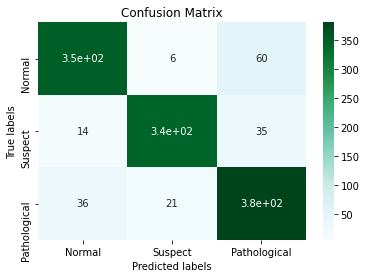

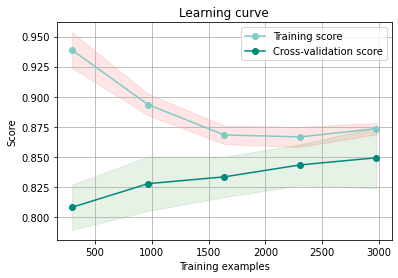

In [32]:
rf_params, rf_tuned = model_RF(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
CrossValMeans: 0.951
CrossValStandard Deviation: 0.007
Classification Report
              precision    recall  f1-score   support

      Normal       1.00      0.90      0.94       415
Pathological       0.98      0.99      0.99       390
     Suspect       0.91      0.99      0.95       437

    accuracy                           0.96      1242
   macro avg       0.96      0.96      0.96      1242
weighted avg       0.96      0.96      0.96      1242

Best parameters
{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}


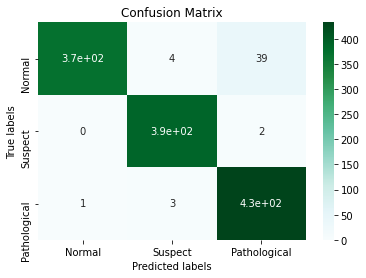

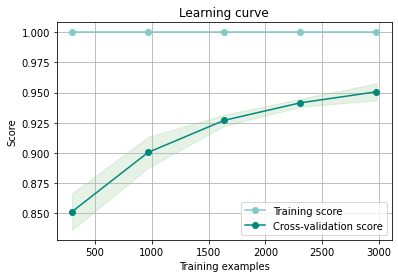

In [33]:
knn_params, knn_tuned = model_KNN(X_train, X_test, y_train, y_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[12:02:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:03:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:03:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:03:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss

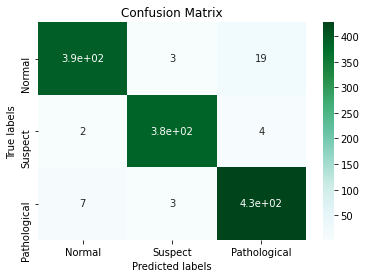

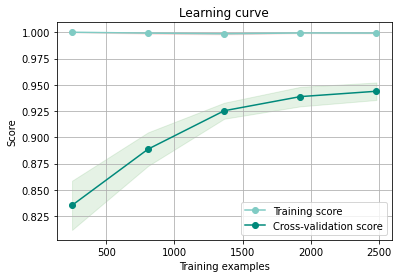

In [34]:
xgb_params, xgb_tuned = model_XGB(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
CrossValMeans: 0.975
CrossValStandard Deviation: 0.004
Classification Report
              precision    recall  f1-score   support

      Normal       1.00      0.97      0.98       415
Pathological       0.99      1.00      1.00       390
     Suspect       0.97      1.00      0.98       437

    accuracy                           0.99      1242
   macro avg       0.99      0.99      0.99      1242
weighted avg       0.99      0.99      0.99      1242

Best parameters
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


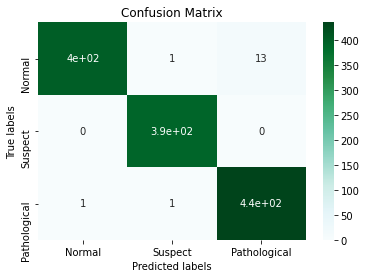

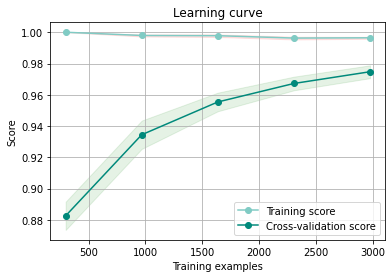

In [35]:
svc_params, svc_tuned = model_SVC(X_train, X_test, y_train, y_test)

[12:34:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

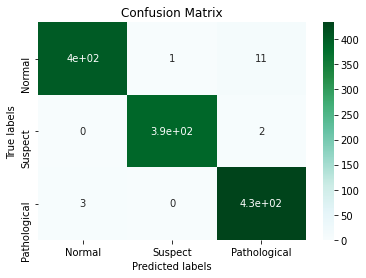

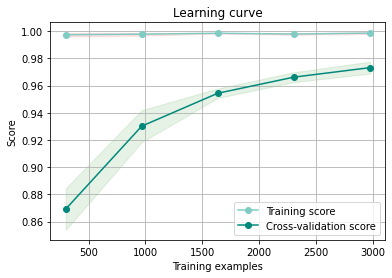

In [36]:
from sklearn.ensemble import StackingClassifier
level0 = list()
level0.append(('svc', SVC(**svc_params)))
level0.append(('knn', KNeighborsClassifier(**knn_params)))
level0.append(('xgb', XGBClassifier(**xgb_params)))
# define meta learner model
level1 = XGBClassifier(**xgb_params)
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
scores_knn= cross_val_score(model, X_train, y_train, cv = 5)
print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")
model.fit(X_train, y_train)
plot_cm(y_test,model.predict(X_test))
plot_learning_curve(model,title = "Learning curve", x = X_train, y = y_train, cv = 5);